Primeiro e executada a validacao cruzada

In [1]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [4]:
import pickle

with open('/content/credit.pkl', 'rb') as file:
    x_treino, y_treino, x_teste, y_teste = pickle.load(file)

In [5]:
from numpy import concatenate

In [6]:
x_credit = concatenate((x_treino, x_teste), axis=0)

In [7]:
y_credit = concatenate((y_treino, y_teste), axis=0)

In [8]:
x_credit.shape

(2000, 3)

In [9]:
y_credit.shape

(2000,)

In [19]:
resultados_arvore = []
resultados_randomForest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_redeNeural = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    
    arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
    scores = cross_val_score(arvore, x_credit, y_credit, cv=kfold)
    resultados_arvore.append(scores.mean())
    
    random_forest = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, n_estimators=40)
    scores = cross_val_score(random_forest, x_credit, y_credit, cv=kfold)
    resultados_randomForest.append(scores.mean())
    
    knn = KNeighborsClassifier(n_neighbors=20, p=1)
    scores = cross_val_score(knn, x_credit, y_credit, cv=kfold)
    resultados_knn.append(scores.mean())
    
    logistica = LogisticRegression(C=1.0, solver='lbfgs', tol=0.0001)
    scores = cross_val_score(logistica, x_credit, y_credit, cv=kfold)
    resultados_logistica.append(scores.mean())
    
    svm = SVC(C=1.5, kernel='rbf', tol=0.001)
    scores = cross_val_score(svm, x_credit, y_credit, cv=kfold)
    resultados_svm.append(scores.mean())
    
    rn = MLPClassifier(activation='relu', batch_size=10, solver='adam')
    scores = cross_val_score(rn, x_credit, y_credit, cv=kfold)
    resultados_redeNeural.append(scores.mean())

In [11]:
import pandas as pd

In [20]:
resultados = pd.DataFrame({
    'Arvore': resultados_arvore, 'Random Forest': resultados_randomForest,
    'KNN': resultados_knn, 'Logistica': resultados_logistica,
    'SVM': resultados_svm, 'Rede Neural': resultados_redeNeural
})

In [21]:
display(resultados)

,Arvore,Random Forest,KNN,Logistica,SVM,Rede Neural
0,0.9870,0.9875,0.9800,0.9475,0.9835,0.9955
1,0.9850,0.9865,0.9800,0.9465,0.9840,0.9965
2,0.9905,0.9880,0.9800,0.9470,0.9835,0.9970
3,0.9875,0.9855,0.9800,0.9460,0.9845,0.9960
4,0.9885,0.9870,0.9810,0.9465,0.9855,0.9985
5,0.9885,0.9875,0.9785,0.9465,0.9835,0.9945
6,0.9885,0.9870,0.9800,0.9470,0.9840,0.9975
7,0.9875,0.9870,0.9805,0.9480,0.9845,0.9950
8,0.9870,0.9860,0.9810,0.9465,0.9820,0.9970
9,0.9870,0.9885,0.9810,0.9465,0.9830,0.9955


In [22]:
resultados.describe()

,Arvore,Random Forest,KNN,Logistica,SVM,Rede Neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987250,0.986700,0.980200,0.946950,0.983983,0.996300
std,0.001649,0.001472,0.001270,0.000687,0.001141,0.000997
min,0.983500,0.983500,0.977500,0.945500,0.982000,0.994500
25%,0.986500,0.985625,0.979625,0.946500,0.983500,0.995500
50%,0.987250,0.986500,0.980000,0.947000,0.984000,0.996500
75%,0.988500,0.987500,0.981000,0.947500,0.984500,0.997000
max,0.990500,0.990000,0.983500,0.948500,0.987000,0.998500


In [23]:
resultados.var() # variancia

Arvore           2.719828e-06
Random Forest    2.165517e-06
KNN              1.613793e-06
Logistica        4.715517e-07
SVM              1.301437e-06
Rede Neural      9.931034e-07
dtype: float64

In [24]:
(resultados.std() / resultados.mean()) * 100 # coeficiente de variacao

Arvore           0.167049
Random Forest    0.149141
KNN              0.129601
Logistica        0.072517
SVM              0.115937
Rede Neural      0.100025
dtype: float64

In [48]:
# Shapiro (teste de normalidade nos resltados)

alpha = 0.05 # confiabilidade dos teste (confianca sera de 95%, valor padrao)

In [26]:
from scipy.stats import shapiro

In [29]:
# comparamos os paramentros da segunda coluna com o valor de alpha (se algum for menor ou igual a alpha, isso indica que o dado nao eh normal)
shapiro(resultados_arvore), shapiro(resultados_randomForest), shapiro(resultados_knn), shapiro(resultados_logistica), shapiro(resultados_svm), shapiro(resultados_redeNeural)

((0.9751203656196594, 0.686276376247406),
 (0.9625005125999451, 0.35829803347587585),
 (0.9244088530540466, 0.03495403751730919),
 (0.9370993375778198, 0.07600117474794388),
 (0.96373051404953, 0.384358674287796),
 (0.9425320625305176, 0.10643357783555984))

In [30]:
from seaborn import displot

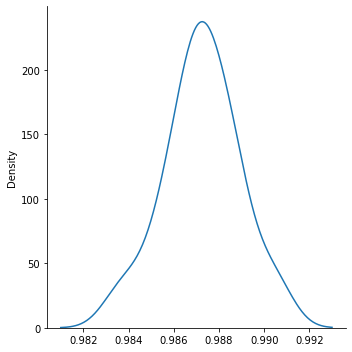

In [32]:
displot(resultados_arvore, kind='kde')

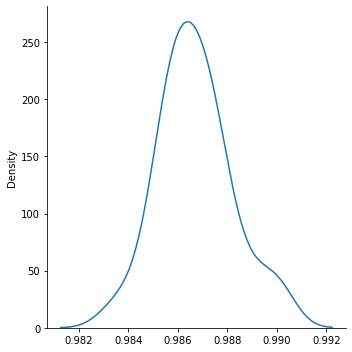

In [34]:
displot(resultados_randomForest, kind='kde')

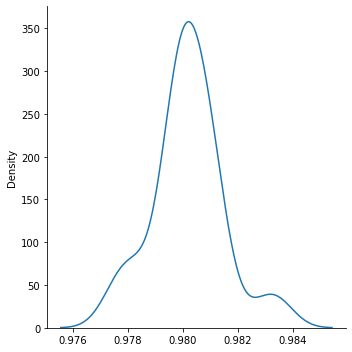

In [35]:
displot(resultados_knn, kind='kde')

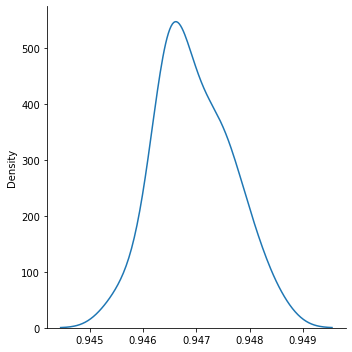

In [36]:
displot(resultados_logistica, kind='kde')

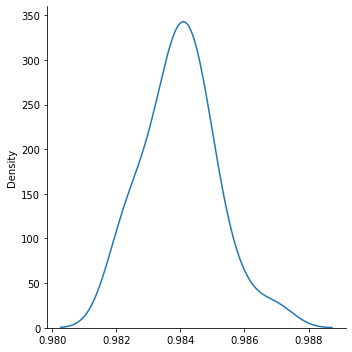

In [37]:
displot(resultados_svm, kind='kde')

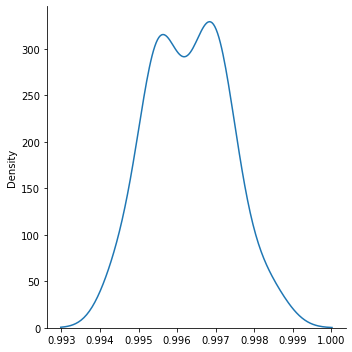

In [38]:
displot(resultados_redeNeural, kind='kde')

In [39]:
from scipy.stats import f_oneway

In [51]:
# p = f_oneway(resultados_arvore, resultados_randomForest, resultados_knn, resultados_logistica, resultados_svm, resultados_redeNeural)

# apenas o valor de p nos interessa, por isso usamos o _, na frente
_,p = f_oneway(resultados_arvore, resultados_randomForest, resultados_knn, resultados_logistica, resultados_svm, resultados_redeNeural)

In [52]:
p

6.517630347390647e-191

In [53]:
if p <= alpha:
  print('Hipótese nula rejeitada. Dados são diferentes')
else:
  print('Hipótese alternativa rejeitada. Resultados são iguais')

Hipótese nula rejeitada. Dados são diferentes


In [56]:
import numpy as np

In [66]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_randomForest, resultados_knn, resultados_logistica, resultados_svm, resultados_redeNeural]),
                         'algoritmo': ['arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore', 
                          'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest', 
                          'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn', 
                          'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica',
                          'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',
                          'rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural']}

In [68]:
resultados_algoritmosDF = pd.DataFrame(resultados_algoritmos)

In [72]:
resultados_algoritmosDF

,accuracy,algoritmo
0,0.9870,arvore
1,0.9850,arvore
2,0.9905,arvore
3,0.9875,arvore
4,0.9885,arvore
...,...,...
175,0.9965,rede_neural
176,0.9945,rede_neural
177,0.9955,rede_neural
178,0.9955,rede_neural


In [73]:
from statsmodels.stats.multicomp import MultiComparison

In [74]:
mc = MultiComparison(resultados_algoritmosDF['accuracy'], resultados_algoritmosDF['algoritmo'])

In [75]:
teste_estatistico = mc.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       arvore           knn   -0.007  0.001  -0.008 -0.0061   True
       arvore     logistica  -0.0403  0.001 -0.0412 -0.0394   True
       arvore random_forest  -0.0006 0.5207 -0.0015  0.0004  False
       arvore   rede_neural   0.0091  0.001  0.0081    0.01   True
       arvore           svm  -0.0033  0.001 -0.0042 -0.0023   True
          knn     logistica  -0.0333  0.001 -0.0342 -0.0323   True
          knn random_forest   0.0065  0.001  0.0056  0.0074   True
          knn   rede_neural   0.0161  0.001  0.0152   0.017   True
          knn           svm   0.0038  0.001  0.0029  0.0047   True
    logistica random_forest   0.0397  0.001  0.0388  0.0407   True
    logistica   rede_neural   0.0494  0.001  0.0484  0.0503   True
    logistica           svm    0.037  0.001  0.0361   0.038   

In [76]:
resultados.mean()

Arvore           0.987250
Random Forest    0.986700
KNN              0.980200
Logistica        0.946950
SVM              0.983983
Rede Neural      0.996300
dtype: float64

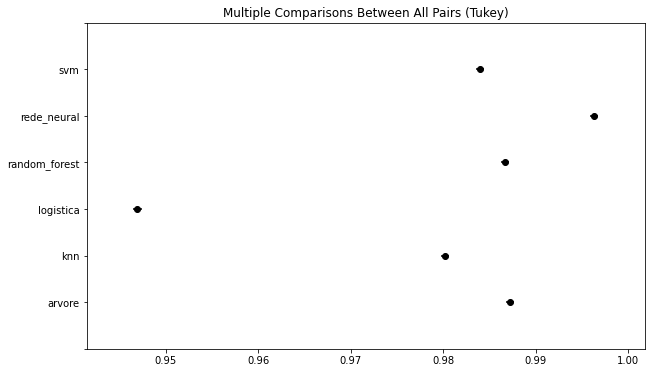

In [77]:
teste_estatistico.plot_simultaneous();